# Práctica 2
@Author: Borja Gete & Fernán Ramos @Versión 1.1.3 @Date 09/03/2016

#### Importación de librerias

In [12]:
import networkx as nx # librería de análisis de redes
import numpy as np # librería de computación numérica
import matplotlib.pyplot as plot # librería de Visualización
%matplotlib inline

#### Función de preparación del Grafo

In [13]:
def preparacion(grafo):
    #Colocamos los pesos en una unica matriz triangular
    #ya que trabajamos con grafos no dirigidos
    lista=[]
    for i in grafo:
        for j in grafo[i]:
            if j<i:
                dato=grafo[i][j]['weight']
                lista.append((j,i,dato))
    grafo.add_weighted_edges_from(lista)
    return grafo

### Definición de función de cálculo de Distancia Mínima

In [14]:
def minimal_distance(grafo,origen):
    adelante=True #Si nos movemos adelante en el historial
    grafo=preparacion(grafo)
    listaMin=[] #Lista de nodos de los que obtener su distancia minima(pendientes)
    diccionario={} #Nodos y su coste desde el origen
    diccionario[origen]='N' #El origen en el grafo se vera con una 'N' 
    for nodo in grafo.nodes():
        listaMin.append(nodo) #Rellenamos la lista
    nodo=origen
    listaMin.remove(nodo) #Sacamos el nodo inicial de la lista de pendientes
    listaVistos=[] #Lista de nodos a analizar desde el nodo actual
    for x in listaMin:
        listaVistos.append(x) 
    historial=[] #lista ordenada de nodos ya analizados por su distancia minima
    while len(listaMin) > 0:
        minimo=-1
        peso=-1
        nodoM=-1
        if adelante==True and nodo != origen:
            historial.append(nodo)
        for analizado in listaVistos:
            if analizado in grafo[nodo]: #Si el nodo analizado es alcanzable desde el actual
                peso=grafo[nodo][analizado]['weight']
                if analizado in diccionario: #Si el nodo analizado ya tenia una distancia almacenada en el diccionario
                    if diccionario[analizado]>(diccionario[nodo]+peso):
                        diccionario[analizado]=diccionario[nodo]+peso #Si la distancia actual es menor, actualizamos
                else:
                    if nodo != origen: #Si el nodo actual no es el origen
                        diccionario[analizado]=diccionario[nodo]+peso #Si no habia distancia minima se introduce
                    else:
                        diccionario[analizado]=peso #Si no habia distancia minima se introduce
            if peso > -1: #Si habia nodos alcanzables
                if minimo == -1 or peso < minimo: 
                    minimo=peso #Obtenemos el nodo de menor peso
                    nodoM=analizado
                    adelante=True
        nodo=nodoM #El siguiente nodo a analizar sera el de distancia minima
        if peso < 0:
            #No hay enlace por lo que volvemos atras un nodo en el historial
            adelante=False
            nodo=historial[0]
            historial.remove(nodo)
        else:
            adelante=True
        if adelante==True:
            listaMin.remove(nodoM)
        listaVistos=listaMin #Obtenemos la lista de nodos de los que obtenemos la distancia al nodo actual
    return diccionario

#### Función de dibujo del grafo

In [15]:
def mostrar_Grafo(nodos,inicial,enlaces):
    #Requiere nodos y enlaces para crear el grafo y el nodo inicial
    G=nx.Graph()
    G.add_nodes_from(nodos)
    G.add_weighted_edges_from(enlaces)
    pos = nx.circular_layout(G)
    dic=minimal_distance(G,inicial)
    nx.draw(G,pos,with_labels=False,node_color='b')
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_labels(G,pos,dic,font_color='w') #Mostramos en cada nodo el coste en llegar hasta él
    #Comentar la siguiente linea para no mostrar los pesos en cada conexión
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels) #Mostramos los pesos iniciales de los enlaces 
    plot.show()
    


#### Introducción de datos de los grafos

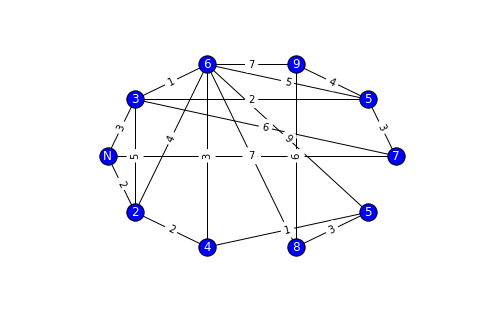

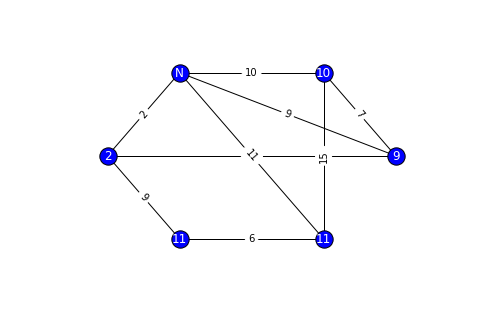

In [16]:
#Ejemplo1
mostrar_Grafo(range(1,11),6,[(1,2,3),(1,5,6),(1,6,7), \
                            (2,3,4),(2,4,5), \
                            (3,4,7),(3,9,6), \
                            (4,5,1),(4,7,4),(4,10,9), \
                            (5,7,5),(5,2,2), \
                            (6,5,3), \
                            (7,6,2),(7,8,2), \
                            (8,4,3),(8,10,1), \
                            (9,4,5),(9,10,3)])
#Ejemplo2
mostrar_Grafo(range(1,6),3,[(1,2,7),(1,3,9),(1,4,14), \
                            (2,3,10),(2,6,15), \
                            (3,4,2),(3,6,11), \
                            (4,5,9), \
                            (5,6,6)])
